<a href="https://colab.research.google.com/github/JonaBaron/TensorFlow/blob/main/03_Computer_vison_%26_convolution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to convolution neural network and computer vision with TF

## Get the data

In [49]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# Unzip the file
zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

/bin/bash: warning: setlocale: LC_ALL: cannot change locale (en_US.UTF-8)
--2025-01-08 19:59:49--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.69.59, 142.250.69.123, 142.250.69.155, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.69.59|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: 'pizza_steak.zip.2'

pizza_steak.zip.2   100%[===================>] 104.47M  13.1MB/s    in 11s     

2025-01-08 20:00:01 (9.35 MB/s) - 'pizza_steak.zip.2' saved [109540975/109540975]



## Inspect the data

In [50]:
!ls pizza_steak

/bin/bash: warning: setlocale: LC_ALL: cannot change locale (en_US.UTF-8)
test  train


In [51]:
!ls pizza_steak/train

/bin/bash: warning: setlocale: LC_ALL: cannot change locale (en_US.UTF-8)
pizza  steak


In [52]:
!ls pizza_steak/train/steak/

/bin/bash: warning: setlocale: LC_ALL: cannot change locale (en_US.UTF-8)
1000205.jpg  1647351.jpg  2238681.jpg  2824680.jpg  3375959.jpg  417368.jpg
100135.jpg   1650002.jpg  2238802.jpg  2825100.jpg  3381560.jpg  4176.jpg
101312.jpg   165639.jpg   2254705.jpg  2826987.jpg  3382936.jpg  42125.jpg
1021458.jpg  1658186.jpg  225990.jpg   2832499.jpg  3386119.jpg  421476.jpg
1032846.jpg  1658443.jpg  2260231.jpg  2832960.jpg  3388717.jpg  421561.jpg
10380.jpg    165964.jpg   2268692.jpg  285045.jpg   3389138.jpg  438871.jpg
1049459.jpg  167069.jpg   2271133.jpg  285147.jpg   3393547.jpg  43924.jpg
1053665.jpg  1675632.jpg  227576.jpg   2855315.jpg  3393688.jpg  440188.jpg
1068516.jpg  1678108.jpg  2283057.jpg  2856066.jpg  3396589.jpg  442757.jpg
1068975.jpg  168006.jpg   2286639.jpg  2859933.jpg  339891.jpg	 443210.jpg
1081258.jpg  1682496.jpg  2287136.jpg  286219.jpg   3417789.jpg  444064.jpg
1090122.jpg  1684438.jpg  2291292.jpg  2862562.jpg  3425047.jpg  444709.jpg
1093966.jpg  168775

In [53]:
import os

# Walk through pizza_steak directory and list number of files
for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in 'pizza_steak'.
There are 2 directories and 0 images in 'pizza_steak/test'.
There are 0 directories and 250 images in 'pizza_steak/test/pizza'.
There are 0 directories and 250 images in 'pizza_steak/test/steak'.
There are 2 directories and 0 images in 'pizza_steak/train'.
There are 0 directories and 750 images in 'pizza_steak/train/pizza'.
There are 0 directories and 750 images in 'pizza_steak/train/steak'.


##To visualize our images let's get class names

In [54]:
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train")
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['pizza' 'steak']


In [55]:
# Let's look at the images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Setup target directory (we'll view images from here)
  target_folder = target_dir+target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")

  print(f"Image shape: {img.shape}") # show the shape of the image

  return img

Image shape: (512, 512, 3)


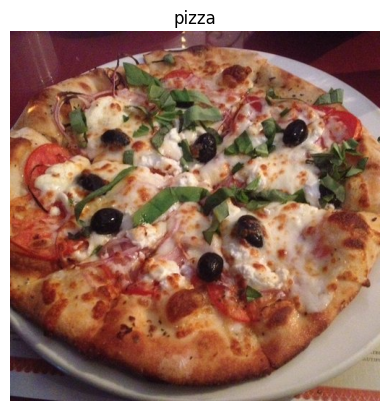

In [56]:
# View a random image from steak
img = view_random_image(target_dir="pizza_steak/train/",
                        target_class="pizza")

In [57]:
import tensorflow as tf
tf.constant(img)

<tf.Tensor: shape=(512, 512, 3), dtype=uint8, numpy=
array([[[ 63,  20,  40],
        [ 66,  23,  43],
        [ 68,  24,  47],
        ...,
        [ 58,  17,  21],
        [ 58,  19,  22],
        [ 58,  19,  22]],

       [[ 67,  24,  44],
        [ 68,  25,  45],
        [ 70,  26,  49],
        ...,
        [ 59,  18,  22],
        [ 59,  20,  23],
        [ 59,  20,  23]],

       [[ 71,  26,  47],
        [ 71,  26,  47],
        [ 72,  27,  48],
        ...,
        [ 58,  17,  21],
        [ 57,  18,  21],
        [ 54,  18,  20]],

       ...,

       [[ 31,  14,  22],
        [ 33,  16,  24],
        [ 35,  18,  26],
        ...,
        [191, 113, 101],
        [197, 119, 107],
        [164,  86,  74]],

       [[ 34,  15,  21],
        [ 33,  14,  20],
        [ 32,  13,  19],
        ...,
        [193, 113, 104],
        [189, 109, 100],
        [168,  88,  79]],

       [[ 42,  23,  27],
        [ 39,  20,  24],
        [ 36,  15,  22],
        ...,
        [183, 103,  9

In [58]:
# View the image shape
img.shape # return width, height, color chanel

(512, 512, 3)

In [59]:
# Get all the pixel values normalize
img/255

array([[[0.24705882, 0.07843137, 0.15686275],
        [0.25882353, 0.09019608, 0.16862745],
        [0.26666667, 0.09411765, 0.18431373],
        ...,
        [0.22745098, 0.06666667, 0.08235294],
        [0.22745098, 0.0745098 , 0.08627451],
        [0.22745098, 0.0745098 , 0.08627451]],

       [[0.2627451 , 0.09411765, 0.17254902],
        [0.26666667, 0.09803922, 0.17647059],
        [0.2745098 , 0.10196078, 0.19215686],
        ...,
        [0.23137255, 0.07058824, 0.08627451],
        [0.23137255, 0.07843137, 0.09019608],
        [0.23137255, 0.07843137, 0.09019608]],

       [[0.27843137, 0.10196078, 0.18431373],
        [0.27843137, 0.10196078, 0.18431373],
        [0.28235294, 0.10588235, 0.18823529],
        ...,
        [0.22745098, 0.06666667, 0.08235294],
        [0.22352941, 0.07058824, 0.08235294],
        [0.21176471, 0.07058824, 0.07843137]],

       ...,

       [[0.12156863, 0.05490196, 0.08627451],
        [0.12941176, 0.0627451 , 0.09411765],
        [0.1372549 , 0

In [60]:
from keras.src.legacy.preprocessing.image import ImageDataGenerator

# Set the seed
tf.random.set_seed(42)

# Create image data generator
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Setup paths to our data
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

# Import data from dir and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)

valid_data = valid_datagen.flow_from_directory(test_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)

# Build a CNN model (Tiny VGG)

model_1 = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(filters=10,
                         kernel_size=3,
                         activation="relu",
                         input_shape=(224, 224, 3)),
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(pool_size=2,
                            padding="valid"),
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the CNN
model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


/home/jo/.virtualenvs/TensorFlow/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 13s 240ms/step - accuracy: 0.6018 - loss: 0.6718 - val_accuracy: 0.7640 - val_loss: 0.4609
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 11s 233ms/step - accuracy: 0.7758 - loss: 0.4732 - val_accuracy: 0.8200 - val_loss: 0.4015
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 11s 232ms/step - accuracy: 0.8151 - loss: 0.4178 - val_accuracy: 0.8640 - val_loss: 0.3717
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 11s 225ms/step - accuracy: 0.8170 - loss: 0.3987 - val_accuracy: 0.8700 - val_loss: 0.3787
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 11s 234ms/step - accuracy: 0.8584 - loss: 0.3578 - val_accuracy: 0.8240 - val_loss: 0.4022


In [61]:
model_1.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_15 (Conv2D)              │ (None, 222, 222, 10)   │           280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 220, 220, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 110, 110, 10)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 108, 108, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_18 (Conv2D)              │ (None, 106, 106, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 53, 53, 10)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_7 (Flatten)             │ (None, 28090)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 1)              │        28,091 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 93,305 (364.48 KB)

 Trainable params: 31,101 (121.49 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 62,204 (242.99 KB)

In [62]:
# Updating the model as before

# Set random seed
tf.random.set_seed(42)

# Create a model to replicate the TensorFlow Playground model
model_2 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(224, 224, 3)), # dense layers expect a 1-dimensional vector as input
  tf.keras.layers.Dense(4, activation='relu'),
  tf.keras.layers.Dense(4, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model_2.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history_2 = model_2.fit(train_data, # use same training data created above
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data, # use same validation data created above
                        validation_steps=len(valid_data))

/home/jo/.virtualenvs/TensorFlow/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 9s 171ms/step - accuracy: 0.5882 - loss: 0.7865 - val_accuracy: 0.7840 - val_loss: 0.5630
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 7s 157ms/step - accuracy: 0.7279 - loss: 0.5879 - val_accuracy: 0.7740 - val_loss: 0.5589
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 7s 157ms/step - accuracy: 0.7507 - loss: 0.6053 - val_accuracy: 0.7660 - val_loss: 0.5499
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 7s 156ms/step - accuracy: 0.7696 - loss: 0.5490 - val_accuracy: 0.6780 - val_loss: 0.5931
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 8s 160ms/step - accuracy: 0.7488 - loss: 0.5523 - val_accuracy: 0.7320 - val_loss: 0.6461


In [63]:
model_2.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_8 (Flatten)             │ (None, 150528)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 4)              │       602,116 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 4)              │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,806,425 (6.89 MB)

 Trainable params: 602,141 (2.30 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,204,284 (4.59 MB)

In [64]:
# Improving our model

# Set random seed
tf.random.set_seed(42)

# Create a model similar to model_1 but add an extra layer and increase the number of hidden units in each layer
model_3 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(224, 224, 3)), # dense layers expect a 1-dimensional vector as input
  tf.keras.layers.Dense(100, activation='relu'), # increase number of neurons from 4 to 100 (for each layer)
  tf.keras.layers.Dense(100, activation='relu'),
  tf.keras.layers.Dense(100, activation='relu'), # add an extra layer
  tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model_3.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history_3 = model_3.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 13s 255ms/step - accuracy: 0.5481 - loss: 5.9622 - val_accuracy: 0.5720 - val_loss: 1.5668
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 11s 244ms/step - accuracy: 0.6969 - loss: 0.8626 - val_accuracy: 0.7560 - val_loss: 0.4868
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 11s 237ms/step - accuracy: 0.7612 - loss: 0.5943 - val_accuracy: 0.5140 - val_loss: 1.1317
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 11s 242ms/step - accuracy: 0.7093 - loss: 0.6617 - val_accuracy: 0.7920 - val_loss: 0.4493
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 11s 239ms/step - accuracy: 0.7426 - loss: 0.5668 - val_accuracy: 0.7820 - val_loss: 0.5311


In [65]:
model_3.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_9 (Flatten)             │ (None, 150528)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 100)            │    15,052,900 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 45,219,605 (172.50 MB)

 Trainable params: 15,073,201 (57.50 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 30,146,404 (115.00 MB)

## Breaking of our model

[See link](https://poloclub.github.io/cnn-explainer/)

### 1. Visualize our data

Image shape: (384, 512, 3)
Image shape: (341, 512, 3)


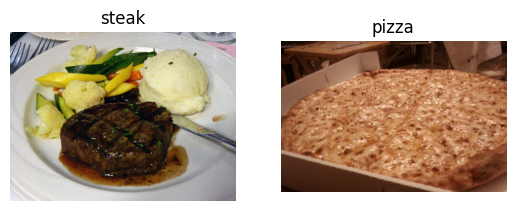

In [66]:
plt.figure()
plt.subplot(1, 2, 1)
steak_img = view_random_image("pizza_steak/train/", "steak")
plt.subplot(1, 2, 2)
pizza_img = view_random_image("pizza_steak/train/", "pizza")

 ### 2. Preprocess the data

In [67]:
# Define training and test directory paths
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

Our next step is to turn our data into **batches**.

A batch is a small subset of the dataset a model looks at during training. For example, rather than looking at 10,000 images at one time and trying to figure out the patterns, a model might only look at 32 images at a time.

It does this for a couple of reasons:

* 10,000 images (or more) might not fit into the memory of your processor (GPU).
* Trying to learn the patterns in 10,000 images in one hit could result in the model not being able to learn very well.


In [68]:
# Create train and test data generators and rescale the data
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

In [69]:
# Load in the images data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode="binary")

test_data = test_datagen.flow_from_directory(test_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode="binary")

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [70]:
# Get a sample of a train data batch
images, labels = train_data.__next__()
len(images), len(labels)

(32, 32)

In [71]:
# how many batches are there
len(train_data)

47

In [72]:
# Get the first two images
images[:2], images[0].shape

(array([[[[0.56078434, 0.63529414, 0.79215693],
          [0.5647059 , 0.6392157 , 0.7960785 ],
          [0.5647059 , 0.6392157 , 0.80392164],
          ...,
          [0.07843138, 0.08235294, 0.05882353],
          [0.08235294, 0.08235294, 0.07450981],
          [0.09803922, 0.09803922, 0.09803922]],
 
         [[0.5647059 , 0.6392157 , 0.7960785 ],
          [0.5568628 , 0.6313726 , 0.7960785 ],
          [0.5568628 , 0.6313726 , 0.7960785 ],
          ...,
          [0.09803922, 0.10196079, 0.07058824],
          [0.0627451 , 0.06666667, 0.04705883],
          [0.04313726, 0.04313726, 0.03529412]],
 
         [[0.5686275 , 0.6431373 , 0.8078432 ],
          [0.5647059 , 0.6392157 , 0.80392164],
          [0.5647059 , 0.6392157 , 0.8078432 ],
          ...,
          [0.07450981, 0.07843138, 0.04705883],
          [0.15686275, 0.16078432, 0.13725491],
          [0.21568629, 0.21960786, 0.20000002]],
 
         ...,
 
         [[0.3921569 , 0.34901962, 0.22352943],
          [0.39607

In [73]:
# View the first batch of labels
labels

array([0., 1., 1., 0., 1., 0., 1., 1., 0., 1., 0., 0., 1., 1., 1., 0., 0.,
       0., 0., 1., 1., 1., 0., 0., 0., 0., 1., 1., 0., 1., 0., 1.],
      dtype=float32)

### 3. Create a CNN modle

In [74]:
# Make the creating of our model a little easier
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.models import Sequential

# Create the model
model_4 = Sequential([
    Conv2D(filters=10, kernel_size=3, activation='relu', input_shape=(224, 224, 3), strides=1, padding='valid'), # Pass stride and padding as positional arguments or use padding='same'    Conv2D(10,3, activation='relu'),
    Conv2D(10,3, activation='relu'),
    Flatten(),
    Dense(1, activation='sigmoid')
])

# Compile the model
model_4.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

# Fit the model
history_4 = model_4.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 11s 228ms/step - accuracy: 0.5087 - loss: 6.9495 - val_accuracy: 0.6460 - val_loss: 0.6272
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 10s 220ms/step - accuracy: 0.7465 - loss: 0.5474 - val_accuracy: 0.7380 - val_loss: 0.5050
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 10s 218ms/step - accuracy: 0.8507 - loss: 0.3900 - val_accuracy: 0.8220 - val_loss: 0.4097
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 10s 217ms/step - accuracy: 0.9182 - loss: 0.2550 - val_accuracy: 0.8060 - val_loss: 0.4300
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 10s 222ms/step - accuracy: 0.9760 - loss: 0.1356 - val_accuracy: 0.8060 - val_loss: 0.4215


### 4. Evaluate our model

<Axes: >

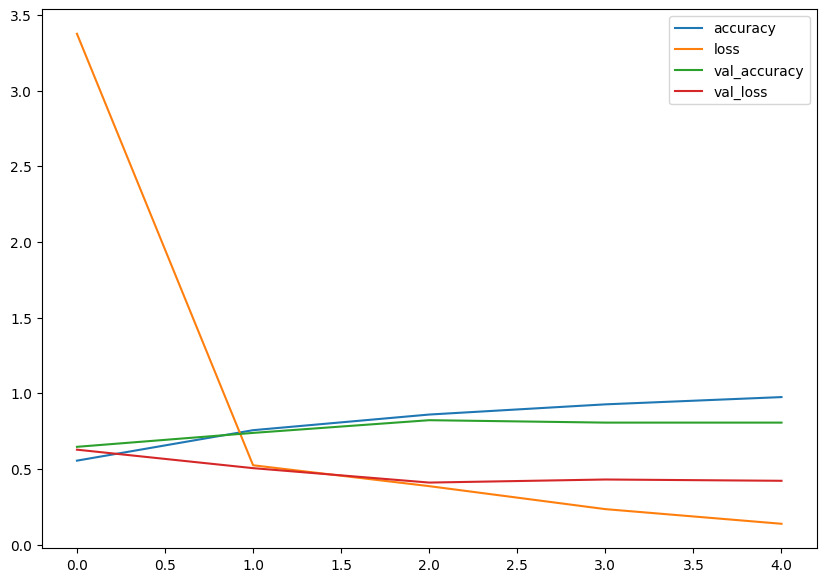

In [75]:
# Plot the history
import pandas as pd
pd.DataFrame(history_4.history).plot(figsize=(10, 7))

In [76]:
# Plot the validation and training curves seperately
def plot_loss_curve(history):
    """
    Return separate loss curves for training and validation metrics
    """

    loss= history.history['loss']
    val_loss= history.history['val_loss']

    accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']
    epochs = range(len(history.history['loss']))

    # Plot loss
    plt.plot(epochs, loss, 'b', label='Training loss')
    plt.plot(epochs, val_loss, 'r', label='Validation loss')
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.legend()

    # Plot accuracy
    plt.figure()
    plt.plot(epochs, accuracy, 'b', label='Training accuracy')
    plt.plot(epochs, val_accuracy, 'r', label='Validation accuracy')
    plt.title('accuracy')
    plt.xlabel('Epochs')
    plt.legend()




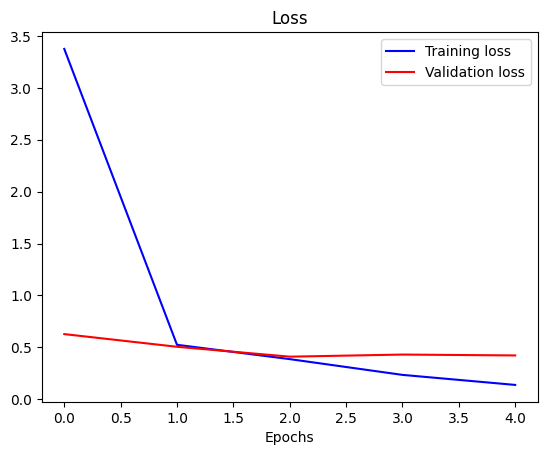

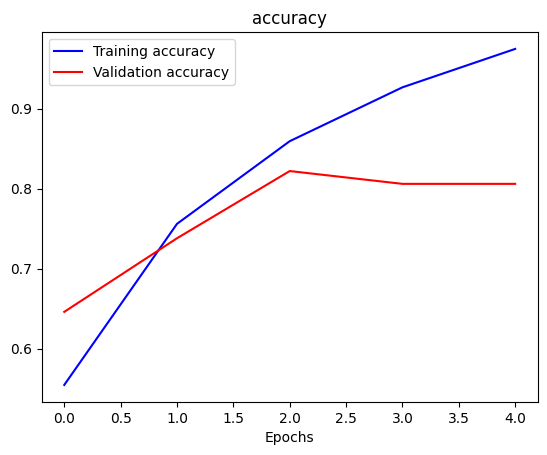

In [77]:
# Check the loss and accuracy of model_4
plot_loss_curve(history_4)

### 5. Adjust our model

To reduce overfitting

In [78]:
# Create the model
model_5 = Sequential([
    Conv2D(10,3, activation='relu', input_shape=(224, 224, 3)),
    MaxPool2D(pool_size=2),
    Conv2D(10,3, activation='relu'),
    MaxPool2D(),
    Conv2D(10,3, activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation='sigmoid')
])

# Compile the model
model_5.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

# Fit the model
history_5 = model_5.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

/home/jo/.virtualenvs/TensorFlow/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 11s 216ms/step - accuracy: 0.6134 - loss: 0.6411 - val_accuracy: 0.7620 - val_loss: 0.5026
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 10s 208ms/step - accuracy: 0.7568 - loss: 0.5096 - val_accuracy: 0.7820 - val_loss: 0.4551
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 9s 198ms/step - accuracy: 0.8086 - loss: 0.4495 - val_accuracy: 0.7980 - val_loss: 0.4215
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 9s 202ms/step - accuracy: 0.7939 - loss: 0.4409 - val_accuracy: 0.8260 - val_loss: 0.3437
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 10s 206ms/step - accuracy: 0.8441 - loss: 0.3679 - val_accuracy: 0.8580 - val_loss: 0.3104


In [79]:
# Get a summary
model_5.summary()

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_21 (Conv2D)              │ (None, 222, 222, 10)   │           280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 111, 111, 10)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_22 (Conv2D)              │ (None, 109, 109, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 54, 54, 10)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_23 (Conv2D)              │ (None, 52, 52, 10)     │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 26, 26, 10)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_11 (Flatten)            │ (None, 6760)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 1)              │         6,761 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 26,585 (103.85 KB)

 Trainable params: 8,861 (34.61 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 17,724 (69.24 KB)

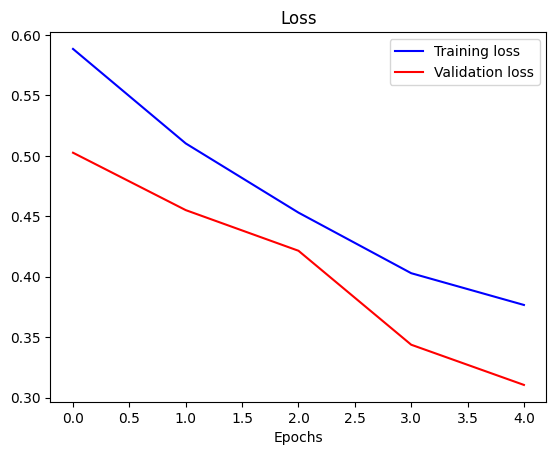

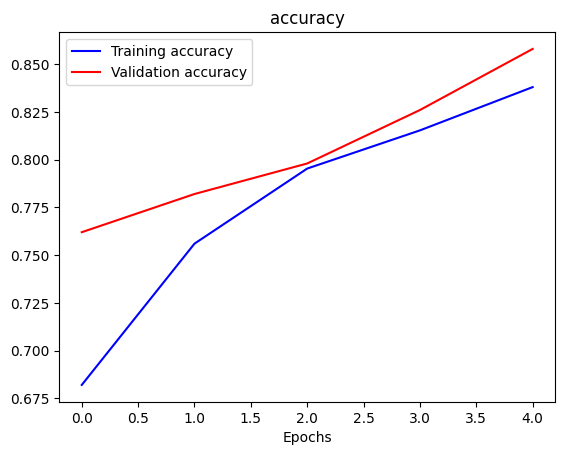

In [80]:
# Plot loss curve
plot_loss_curve(history_5)

#### Data augmentation

In [81]:
# Create ImageDataGenerator training instance with data augmentation
train_datagen_augmented = ImageDataGenerator(rescale=1/255., rotation_range=0.2, shear_range=0.2, zoom_range=0.2, width_shift_range=0.2, height_shift_range=0.3, horizontal_flip=True)

# Create ImageDataGenerator without data augmentation
train_datagen = ImageDataGenerator(rescale=1/255.)
# Create ImageDataGenerator without data augmentation for the test dataset
test_datagen = ImageDataGenerator(rescale=1/255.)

In [82]:
# Let's see data augmentation
print("Augmented training data:")
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224, 224),
                                                                   batch_size=32,
                                                                   class_mode="binary",
                                                                   shuffle=False)
# Create non augmented train data batches
print("Non-augmented training data:")
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode="binary",
                                               shuffle=False)
# Create non-augmented test data batches
print("Non augmented test data:")
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224, 224),
                                             batch_size=32,
                                             class_mode="binary")

Augmented training data:
Found 1500 images belonging to 2 classes.
Non-augmented training data:
Found 1500 images belonging to 2 classes.
Non augmented test data:
Found 500 images belonging to 2 classes.


In [83]:
# Get sample data batches
images, labels = next(train_data)
augmented_images, augmented_labels = next(train_data_augmented)

showing image number 18


(np.float64(-0.5), np.float64(223.5), np.float64(223.5), np.float64(-0.5))

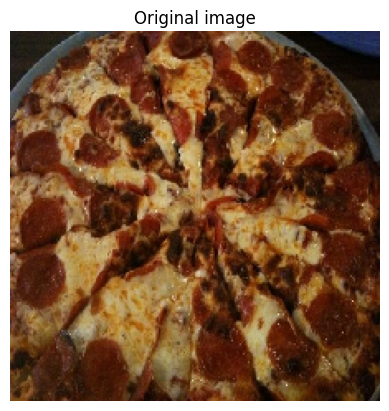

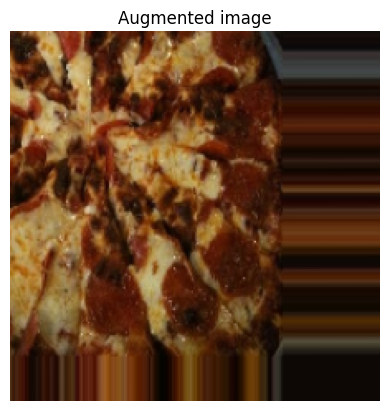

In [84]:
# Show original image and augmented image
import random
random_number = random.randint(0,32)
print(f"showing image number {random_number}")
plt.imshow(images[random_number])
plt.title(f"Original image")
plt.axis('off')
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title(f"Augmented image")
plt.axis('off')

In [85]:
# Fitting the model on augmented training data

# Create the model
model_6 = Sequential([
    Conv2D(10,3, activation='relu'),
    MaxPool2D(pool_size=2),
    Conv2D(10,3, activation='relu'),
    MaxPool2D(),
    Conv2D(10,3, activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation='sigmoid')
])

# Compile the model
model_6.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

# Fit the model
history_6 = model_6.fit(train_data_augmented,
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=len(test_data))

/home/jo/.virtualenvs/TensorFlow/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 20s 400ms/step - accuracy: 0.6268 - loss: 0.9499 - val_accuracy: 0.5880 - val_loss: 0.6873
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 18s 388ms/step - accuracy: 0.4877 - loss: 0.6941 - val_accuracy: 0.6900 - val_loss: 0.6826
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 18s 391ms/step - accuracy: 0.5753 - loss: 0.6897 - val_accuracy: 0.6860 - val_loss: 0.6538
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 18s 392ms/step - accuracy: 0.6176 - loss: 0.6805 - val_accuracy: 0.5140 - val_loss: 0.6650
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 18s 393ms/step - accuracy: 0.5904 - loss: 0.6631 - val_accuracy: 0.6740 - val_loss: 0.5919


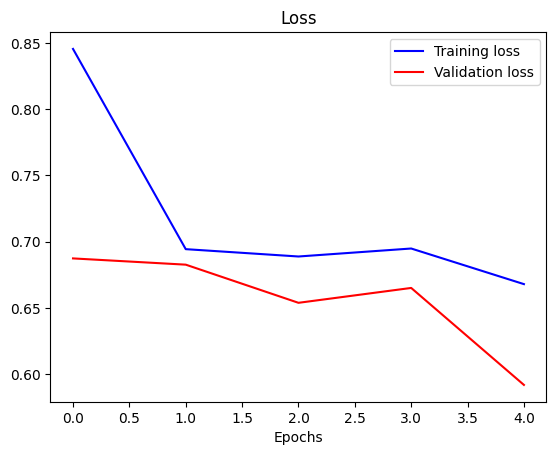

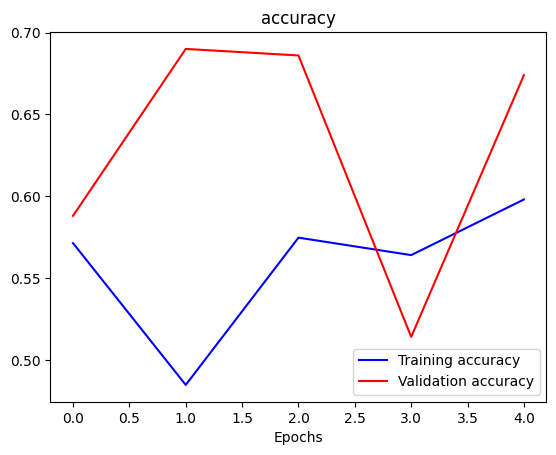

In [86]:
# Plot the loss curve
plot_loss_curve(history_6)

Let's shuffle our augmented training data and train another model(the same as before) on it and see what happens

In [87]:
train_data_augmented_shuffled = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224, 224),
                                                                   batch_size=32,
                                                                   class_mode="binary")

Found 1500 images belonging to 2 classes.


In [88]:
# Fitting the model on augmented shuffled training data

# Create the model
model_7 = Sequential([
    Conv2D(10,3, activation='relu'),
    MaxPool2D(pool_size=2),
    Conv2D(10,3, activation='relu'),
    MaxPool2D(),
    Conv2D(10,3, activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation='sigmoid')
])

# Compile the model
model_7.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

# Fit the model
history_7 = model_7.fit(train_data_augmented_shuffled,
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented_shuffled),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 20s 403ms/step - accuracy: 0.5704 - loss: 0.6756 - val_accuracy: 0.7540 - val_loss: 0.5098
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 19s 410ms/step - accuracy: 0.6905 - loss: 0.5717 - val_accuracy: 0.8240 - val_loss: 0.4195
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 19s 397ms/step - accuracy: 0.7485 - loss: 0.5161 - val_accuracy: 0.8460 - val_loss: 0.3869
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 18s 393ms/step - accuracy: 0.7586 - loss: 0.5128 - val_accuracy: 0.8480 - val_loss: 0.3669
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 19s 399ms/step - accuracy: 0.7723 - loss: 0.4728 - val_accuracy: 0.8520 - val_loss: 0.3416


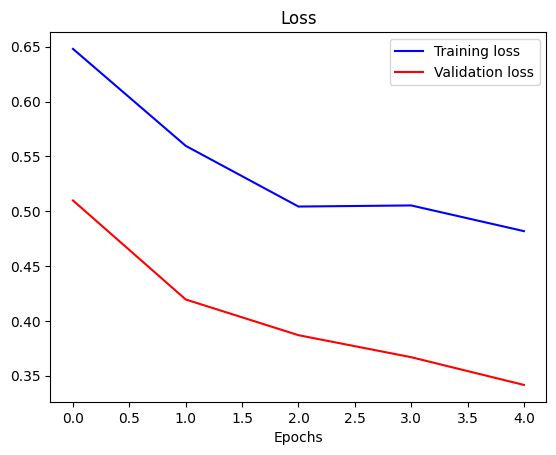

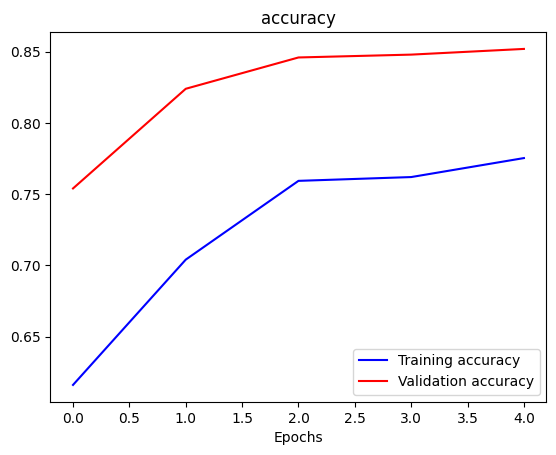

In [89]:
# Plot loss curves
plot_loss_curve(history_7)

### 6. Repete until satified

There are a few things we could try to continue to improve our model:

* Increase the number of model layers (e.g. add more convolutional layers).
* Increase the number of filters in each convolutional layer (e.g. from 10 to 32, 64, or 128, these numbers aren't set in stone either, they are usually found through trial and error).
* Train for longer (more epochs).
* Finding an ideal learning rate.
* Get more data (give the model more opportunities to learn).
* Use transfer learning to leverage what another image model has learned and adjust it for our own use case.


## making a prediction with our trained model

In [90]:
# Get steak picture
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/refs/heads/main/images/03-steak.jpeg
steak = mpimg.imread('03-steak.jpeg')

/bin/bash: warning: setlocale: LC_ALL: cannot change locale (en_US.UTF-8)
--2025-01-08 20:07:43--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/refs/heads/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1978213 (1.9M) [image/jpeg]
Saving to: '03-steak.jpeg.4'

03-steak.jpeg.4     100%[===================>]   1.89M  2.72MB/s    in 0.7s    

2025-01-08 20:07:44 (2.72 MB/s) - '03-steak.jpeg.4' saved [1978213/1978213]



(np.float64(-0.5), np.float64(3023.5), np.float64(4031.5), np.float64(-0.5))

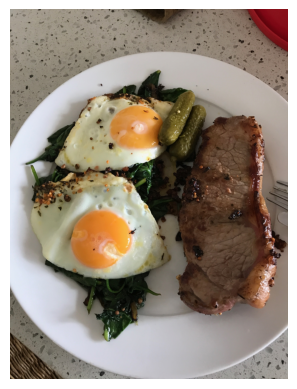

In [91]:
plt.imshow(steak)
plt.axis('off')

In [92]:
# Check the shape of our image
steak.shape

(4032, 3024, 3)

In [93]:
# Create a function to import and resize it to be able to be used with our model
def load_and_prep_image(filename, img_shape=224):
  """
  Reads an image from filename, turns it into a tensor
  and reshapes it to (img_shape, img_shape, colour_channel).
  """
  # Read in target file (an image)
  img = tf.io.read_file(filename)

  # Decode the read file into a tensor & ensure 3 colour channels
  img = tf.image.decode_image(img, channels=3)

  # Resize the image
  img = tf.image.resize(img, size = [img_shape, img_shape])

  # Rescale the image
  img = img/255.
  return img

In [94]:
#load and preprocce our picture
steak = load_and_prep_image('03-steak.jpeg')
steak

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.6377451 , 0.6220588 , 0.57892156],
        [0.6504902 , 0.63186276, 0.5897059 ],
        [0.63186276, 0.60833335, 0.5612745 ],
        ...,
        [0.52156866, 0.05098039, 0.09019608],
        [0.49509802, 0.04215686, 0.07058824],
        [0.52843136, 0.07745098, 0.10490196]],

       [[0.6617647 , 0.6460784 , 0.6107843 ],
        [0.6387255 , 0.6230392 , 0.57598037],
        [0.65588236, 0.63235295, 0.5852941 ],
        ...,
        [0.5352941 , 0.06862745, 0.09215686],
        [0.529902  , 0.05931373, 0.09460784],
        [0.5142157 , 0.05539216, 0.08676471]],

       [[0.6519608 , 0.6362745 , 0.5892157 ],
        [0.6392157 , 0.6137255 , 0.56764704],
        [0.65637255, 0.6269608 , 0.5828431 ],
        ...,
        [0.53137255, 0.06470589, 0.08039216],
        [0.527451  , 0.06862745, 0.1       ],
        [0.52254903, 0.05196078, 0.0872549 ]],

       ...,

       [[0.49313724, 0.42745098, 0.31029412],
        [0.05

In [100]:
pred = model_7.predict(tf.expand_dims(steak, axis=0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


In [101]:
# Remind ourselves of our class names
class_names

array(['pizza', 'steak'], dtype='<U5')

In [102]:
# We can index the predicted class by rounding the prediction probability
pred_class = class_names[int(tf.round(pred)[0][0])]
pred_class

np.str_('steak')

In [105]:
def pred_and_plot(model, filename, class_names):
  """
  Imports an image, makes a prediction with
  a model and plots the image with the predicted class.
  """
  # get the image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Get the predicted class (name)
  pred_class = class_names[int(tf.round(pred))]

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


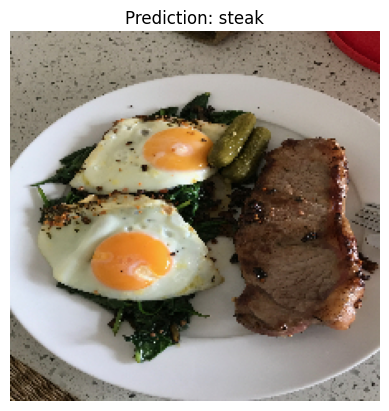

In [106]:
# Test our model on a custom image
pred_and_plot(model_7, "03-steak.jpeg", class_names)

/bin/bash: warning: setlocale: LC_ALL: cannot change locale (en_US.UTF-8)
--2025-01-08 20:23:55--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/refs/heads/main/images/03-pizza-dad.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2874848 (2.7M) [image/jpeg]
Saving to: '03-pizza-dad.jpeg.1'

03-pizza-dad.jpeg.1 100%[===================>]   2.74M  2.54MB/s    in 1.1s    

2025-01-08 20:23:57 (2.54 MB/s) - '03-pizza-dad.jpeg.1' saved [2874848/2874848]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


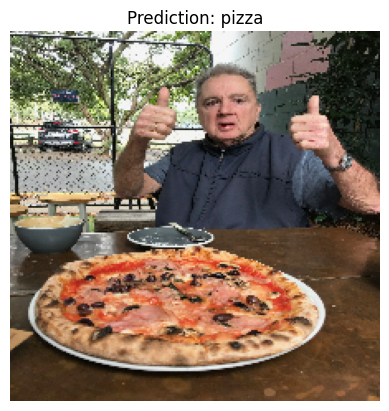

In [108]:
# Download another image of pizza
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/refs/heads/main/images/03-pizza-dad.jpeg
pred_and_plot(model_7, "03-pizza-dad.jpeg", class_names)

# Multiclass image classification

## 1. Import the data

In [109]:
# Download the data
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

# Unzip the data
zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip", "r")
zip_ref.extractall()
zip_ref.close()

/bin/bash: warning: setlocale: LC_ALL: cannot change locale (en_US.UTF-8)
--2025-01-08 20:44:10--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.69.155, 142.250.69.91, 142.250.69.59, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.69.155|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: '10_food_classes_all_data.zip'

10_food_classes_all 100%[===================>] 495.13M  11.4MB/s    in 40s     

2025-01-08 20:44:50 (12.4 MB/s) - '10_food_classes_all_data.zip' saved [519183241/519183241]



In [110]:
import os

# See the 10_food_classes dir and list number of files
for dirpath, dirnames, filenames in os.walk("10_food_classes_all_data"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in '10_food_classes_all_data'.
There are 10 directories and 0 images in '10_food_classes_all_data/test'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/chicken_curry'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/chicken_wings'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/fried_rice'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/grilled_salmon'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/hamburger'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/ice_cream'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/pizza'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/ramen'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/steak'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/sushi'.
There are 

In [111]:
# Set dir for train and test
train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"

In [112]:
# Get the class names
import pathlib
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


Image shape: (384, 512, 3)


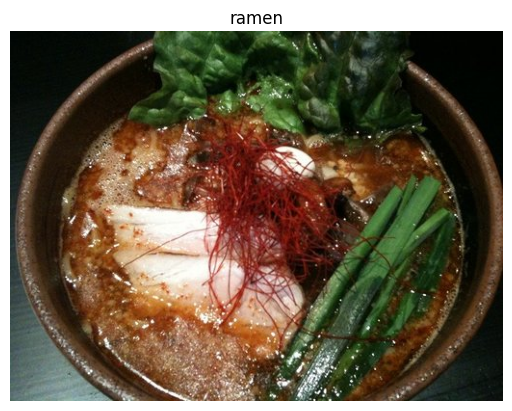

In [131]:
# See random picture
img = view_random_image(target_dir=train_dir,
                        target_class=random.choice(class_names)) # get a random class name

## 2. Preprocess the data

In [128]:
# Rescale the data and create data generator
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

# Load data in from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode='categorical') # changed to categorical

test_data = train_datagen.flow_from_directory(test_dir,
                                              target_size=(224, 224),
                                              batch_size=32,
                                              class_mode='categorical')

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


## 3. Create a model

In [132]:
# Create our model
model_8 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(10, activation='softmax') # changed to have 10 neurons (same as number of classes) and 'softmax' activation
])

# Compile the model
model_8.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history_8 = model_8.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

/home/jo/.virtualenvs/TensorFlow/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/home/jo/.virtualenvs/TensorFlow/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 65s 269ms/step - accuracy: 0.1666 - loss: 2.2291 - val_accuracy: 0.2856 - val_loss: 2.0081
Epoch 2/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 58s 247ms/step - accuracy: 0.3243 - loss: 1.9471 - val_accuracy: 0.3028 - val_loss: 1.9312
Epoch 3/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 53s 226ms/step - accuracy: 0.4136 - loss: 1.7128 - val_accuracy: 0.3080 - val_loss: 1.9615
Epoch 4/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 52s 219ms/step - accuracy: 0.6342 - loss: 1.1241 - val_accuracy: 0.2972 - val_loss: 2.2161
Epoch 5/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 53s 224ms/step - accuracy: 0.8569 - loss: 0.4753 - val_accuracy: 0.2704 - val_loss: 3.0728


## 4. Evaluate the model

In [133]:
# Evaluate the model
model_8.evaluate(test_data)

79/79 ━━━━━━━━━━━━━━━━━━━━ 11s 138ms/step - accuracy: 0.2632 - loss: 3.0518


[3.0727784633636475, 0.2703999876976013]

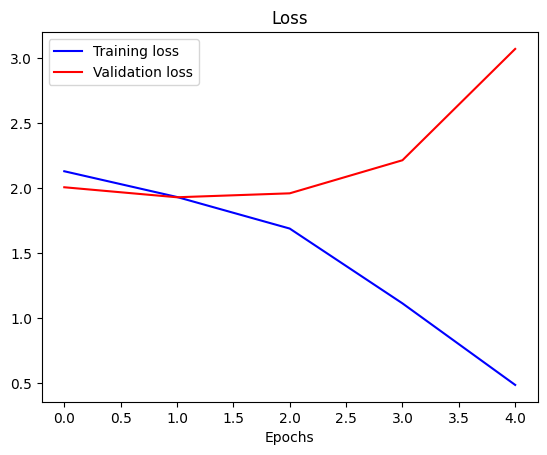

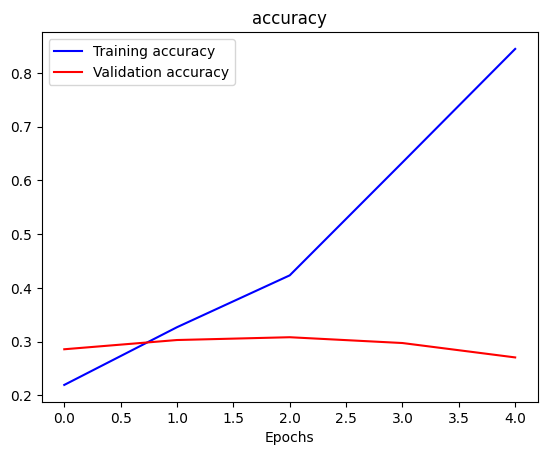

In [134]:
# Plot lost curve
plot_loss_curve(history_8)

### The model is overfiting

## Adjust the model
* Get more data - Having more data gives the model more opportunities to learn patterns, patterns which may be more generalizable to new examples.
* Simplify model - If the current model is already overfitting the training data, it may be too complicated of a model. This means it's learning the patterns of the data too well and isn't able to generalize well to unseen data. One way to simplify a model is to reduce the number of layers it uses or to reduce the number of hidden units in each layer.
* Use data augmentation - Data augmentation manipulates the training data in a way so that's harder for the model to learn as it artificially adds more variety to the data. If a model is able to learn patterns in augmented data, the model may be able to generalize better to unseen data.
* Use transfer learning - Transfer learning involves leverages the patterns (also called pretrained weights) one model has learned to use as the foundation for your own task. In our case, we could use one computer vision model pretrained on a large variety of images and then tweak it slightly to be more specialized for food images.


In [135]:
# Let's simplify the model
# Create our model
model_9 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(10, activation='softmax') # changed to have 10 neurons (same as number of classes) and 'softmax' activation
])

# Compile the model
model_9.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history_9 = model_9.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 54s 218ms/step - accuracy: 0.1780 - loss: 2.4033 - val_accuracy: 0.3372 - val_loss: 1.8983
Epoch 2/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 44s 186ms/step - accuracy: 0.3928 - loss: 1.7989 - val_accuracy: 0.3520 - val_loss: 1.8567
Epoch 3/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 43s 183ms/step - accuracy: 0.5279 - loss: 1.4397 - val_accuracy: 0.3424 - val_loss: 1.9509
Epoch 4/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 44s 187ms/step - accuracy: 0.6973 - loss: 1.0122 - val_accuracy: 0.3180 - val_loss: 2.0834
Epoch 5/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 44s 189ms/step - accuracy: 0.8533 - loss: 0.5607 - val_accuracy: 0.3084 - val_loss: 2.4200


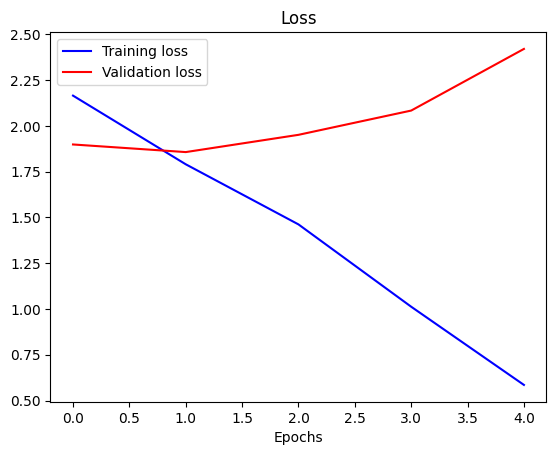

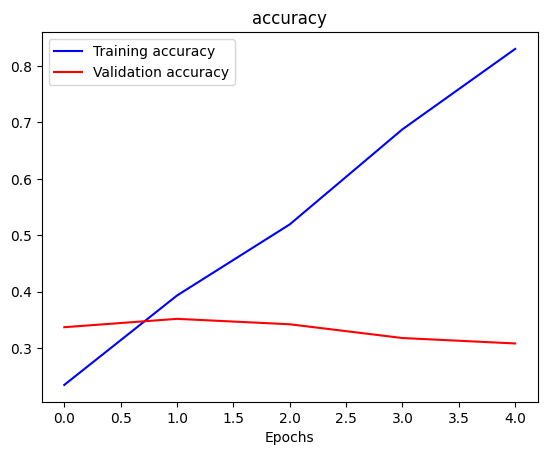

In [136]:
# Plot loss curves
plot_loss_curve(history_9)

In [137]:
model_8.summary()

Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_30 (Conv2D)              │ (None, 222, 222, 10)   │           280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_31 (Conv2D)              │ (None, 220, 220, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_22 (MaxPooling2D) │ (None, 110, 110, 10)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_32 (Conv2D)              │ (None, 108, 108, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_33 (Conv2D)              │ (None, 106, 106, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_23 (MaxPooling2D) │ (None, 53, 53, 10)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_14 (Flatten)            │ (None, 28090)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 10)             │       280,910 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 851,762 (3.25 MB)

 Trainable params: 283,920 (1.08 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 567,842 (2.17 MB)

In [138]:
model_9.summary()

Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_34 (Conv2D)              │ (None, 222, 222, 10)   │           280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_24 (MaxPooling2D) │ (None, 111, 111, 10)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_35 (Conv2D)              │ (None, 109, 109, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_25 (MaxPooling2D) │ (None, 54, 54, 10)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_15 (Flatten)            │ (None, 29160)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 10)             │       291,610 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 878,402 (3.35 MB)

 Trainable params: 292,800 (1.12 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 585,602 (2.23 MB)

### Let's try data augmentation

In [139]:
# Create ImageDataGenerator training instance with data augmentation
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=0.2,
                                             zoom_range=0.2,
                                             width_shift_range=0.2,
                                             height_shift_range=0.3,
                                             horizontal_flip=True)

train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224, 224),
                                                                   batch_size=32,
                                                                   class_mode="categorical")

Found 7500 images belonging to 10 classes.


In [142]:
#Clone the model 8
model_10= tf.keras.models.clone_model(model_8)

model_10.compile(loss="categorical_crossentropy",
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

history_10 = model_10.fit(train_data_augmented,
             epochs=5,
             steps_per_epoch=len(train_data_augmented),
             validation_data=train_data_augmented,
             validation_steps=len(train_data_augmented))


Epoch 1/5
 25/235 ━━━━━━━━━━━━━━━━━━━━ 1:15 359ms/step - accuracy: 0.1203 - loss: 2.3083

KeyboardInterrupt: 